In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [11]:
from Tools import tic,toc, get_loader, fit_data, predict_data

# loading raw dataset

In [4]:
import tonic

download = False
learn_set = tonic.datasets.NMNIST(save_to='../Data/',
                                  train=True, download=download,
                                  transform=tonic.transforms.AERtoVector()
                                 )
nb_pola = 2
name_net = 'raw'

In [5]:
records_path = '../Records'
timestr = '2021-02-16'
ds = 1200
nb_train = int(len(learn_set)//ds)
print(f'The dataset has size {len(learn_set)}, using {nb_train}')

The dataset has size 60000, using 50


# loading output of HOTS as a dataset

In [6]:
from mix_Network import network
name = 'homhots'
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nblay = 3
nbclust = 4
filt = 2

In [6]:
learn_set, nb_pola, name_net = get_loader(name, nb_train, True, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)

2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False
../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_50_[None, None].pkl
2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False


# fitting LR on the output of HOTS

In [11]:
learning_rate = 0.005
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 5 + 1
#num_epochs = 2 ** 9 + 1
num_epochs

33

In [ ]:
f_name = records_path+f'/EXP_03_NMNIST/models/{name_net}_LR_{nb_train}.pkl'
tic()
model, loss = fit_data(f_name, learn_set, nb_train,nb_pola,learning_rate,num_epochs,betas,verbose=True)
toc()

# testing output of HOTS as a dataset

In [8]:
test_set = tonic.datasets.NMNIST(save_to='../Data/',
                                train=False, download=download,
                                transform=tonic.transforms.AERtoVector())

In [9]:
nb_test = int(len(test_set)//ds)
print(f'The dataset has size {len(test_set)}, using {nb_test}')

The dataset has size 10000, using 8


In [12]:
test_set, nb_pola, name_net = get_loader(name, nb_test, False, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)

2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_8_[None, None].pkl
2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False


In [13]:
pred_target, true_target = predict_data(test_set, model)

NameError: name 'model' is not defined

In [47]:
accuracy = []
onlinac = np.zeros(10000) # vector that has size bigger than all event stream size
for pred_target_, true_target_ in zip(pred_target, true_target):
    accuracy.append(np.mean(pred_target_ == true_target_))
    fill_pred = pred_target_[-1]*np.ones(len(onlinac)-len(pred_target_))
    fill_true = true_target_[-1]*np.ones(len(onlinac)-len(pred_target_))
    #fill_pred[:] = np.NaN
    #fill_true[:] = np.NaN
    pred_target_ = np.concatenate([pred_target_,fill_pred])
    true_target_ = np.concatenate([true_target_,fill_true])
    onlinac+=(pred_target_ == true_target_)
print(f'{np.nanmean(accuracy)=:.3f}')

np.nanmean(accuracy)=0.889


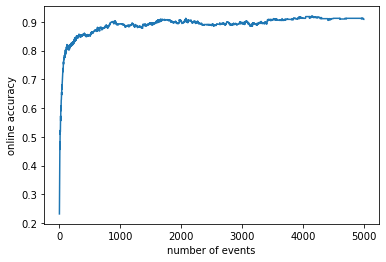

In [49]:
import matplotlib.pyplot as plt
plt.plot(onlinac[:5000]/nb_test);
plt.xlabel('number of events');
plt.ylabel('online accuracy');

In [18]:
from Tools import runjit
name = 'homhots'
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nblay = 3
nbclust = 4
filt = 2
jit_s = np.arange(0,6,0.2)
jit_t = np.arange(0,300,10)
jit_s, jit_t = jit_s**2, jit_t**2

score_T, jit_t, score_S, jit_s = runjit(timestr, name, filt, tau, nblay, nbclust, sigma, homeinv, jitter, jit_s, jit_t, nb_train, nb_test, verbose=True)

2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False
2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False
../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_50_[None, None]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_8_[None, 0.0]_histo.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 50.0% - eucli = 50.0% - norm = 50.0%
Classification scores with entropy: Kullback-Leibler = 50.0% - Jensen-Shannon = 50.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]


100%|██████████| 8/8 [00:26<00:00,  3.26s/it]


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 12.5% - eucli = 12.5% - norm = 12.5%
Classification scores with entropy: Kullback-Leibler = 12.5% - Jensen-Shannon = 12.5%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_8_[None, 1.4]_histo.pkl
spatial jitter -> var = 1.4



 38%|███▊      | 3/8 [00:04<00:08,  1.62s/it]

KeyboardInterrupt: 